***this n-gram includes whitespaces***

In [1]:
%pip install decorator==5.0.9

import imp
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import networkx as nx

Note: you may need to restart the kernel to use updated packages.


In [2]:
# importing local modules

import sys
sys.path.append('../src/')

import text_cleanup.text_cleanup as thesisCleanUp
import preprocessing.text_preprocessing as thesisTextPreprocessing
import data.reader as thesisDataReader
import utils.utils as thesisUtils

imp.reload(thesisCleanUp)
imp.reload(thesisTextPreprocessing)
imp.reload(thesisDataReader)
imp.reload(thesisUtils)

<module 'utils.utils' from '../src/utils/utils.py'>

In [3]:
a_zwickau_text = thesisDataReader.read_a_zwickau()
b_london_text = thesisDataReader.read_b_london()

In [4]:
a_zwickau_corpus = thesisCleanUp.create_corpus_by_line(thesisCleanUp.jvtext(a_zwickau_text))
b_london_corpus = thesisCleanUp.create_corpus_by_line(thesisCleanUp.jvtext(b_london_text))

In [5]:
def get_features(corpus):
    vectorizer = TfidfVectorizer(ngram_range=(3,3), analyzer='char')
    sparse_matrix = vectorizer.fit_transform(corpus)
    doc_term_matrix = sparse_matrix.todense()
    df = pd.DataFrame(doc_term_matrix, columns=vectorizer.get_feature_names())
    return df

In [6]:
a_zwickau_df = get_features(a_zwickau_corpus)
a_zwickau_similarities = cosine_similarity(a_zwickau_df, a_zwickau_df)

b_london_df = get_features(b_london_corpus)
b_london_similarities = cosine_similarity(b_london_df, b_london_df)

In [7]:
def show_similarities_data(similarities):
    for index, value in enumerate(similarities):
        max_indices = thesisUtils.get_n_indexes_of_max_values(value, 6)
        print('___ max similariry for paragraph: {} ___'.format(index))
        for i in max_indices:
            print('index: [{}] value: {}'.format(i, similarities[index][i]))
        print('average: {}'.format(np.average(value)))

        unique, counts = np.unique(value, return_counts=True)
        unique_dictionary = dict(zip(unique, counts))
        print('0 similarities: {}'.format(unique_dictionary.get(0.0)))

        print()

In [8]:
show_similarities_data(a_zwickau_similarities)

___ max similariry for paragraph: 0 ___
index: [269] value: 0.11165941543511804
index: [6] value: 0.11360600709488294
index: [194] value: 0.11363270516670225
index: [46] value: 0.14791476006872642
index: [321] value: 0.16106718049826096
index: [0] value: 1.0
average: 0.042120873146186746
0 similarities: 2

___ max similariry for paragraph: 1 ___
index: [313] value: 0.42895315132504214
index: [282] value: 0.4320125596273652
index: [280] value: 0.45644371363213665
index: [5] value: 0.45873644045910217
index: [6] value: 0.4629614667404501
index: [1] value: 1.0000000000000004
average: 0.2521301041692205
0 similarities: None

___ max similariry for paragraph: 2 ___
index: [280] value: 0.3187640877052215
index: [313] value: 0.3195787209213185
index: [282] value: 0.32834158206379616
index: [212] value: 0.3413239078560498
index: [5] value: 0.3578765152493487
index: [2] value: 1.0000000000000007
average: 0.19080340930799017
0 similarities: None

___ max similariry for paragraph: 3 ___
index: [2

index: [297] value: 0.36199691835285025
index: [318] value: 0.365748556103641
index: [185] value: 0.37759781675093634
index: [184] value: 0.3971807562549221
index: [200] value: 0.42499368437876245
index: [197] value: 1.0000000000000004
average: 0.21573402625064741
0 similarities: None

___ max similariry for paragraph: 198 ___
index: [280] value: 0.22981204470341765
index: [64] value: 0.23264763620232762
index: [169] value: 0.23435157519885322
index: [105] value: 0.2344723481016992
index: [196] value: 0.23685061696934764
index: [198] value: 1.0000000000000002
average: 0.13516761258224422
0 similarities: None

___ max similariry for paragraph: 199 ___
index: [68] value: 0.23160010834728986
index: [169] value: 0.23230342605228949
index: [88] value: 0.30328912494707105
index: [197] value: 0.30609315985359975
index: [200] value: 0.33231835686564004
index: [199] value: 1.0000000000000004
average: 0.1336025037010974
0 similarities: None

___ max similariry for paragraph: 200 ___
index: [88] 

In [9]:
show_similarities_data(b_london_similarities)

___ max similariry for paragraph: 0 ___
index: [21] value: 0.129346566709385
index: [262] value: 0.13479592106921323
index: [209] value: 0.1455995096978622
index: [311] value: 0.1523254382311273
index: [19] value: 0.19424291820328934
index: [0] value: 1.0
average: 0.04975818585227916
0 similarities: None

___ max similariry for paragraph: 1 ___
index: [276] value: 0.4275299281128055
index: [305] value: 0.4293473977846831
index: [272] value: 0.4435626005880646
index: [5] value: 0.45272067980082403
index: [313] value: 0.46181492771959387
index: [1] value: 1.0000000000000004
average: 0.27133268079570916
0 similarities: None

___ max similariry for paragraph: 2 ___
index: [176] value: 0.3339014405035405
index: [305] value: 0.3380294763492533
index: [273] value: 0.3445821594562466
index: [220] value: 0.35273549077849575
index: [5] value: 0.3741902581465854
index: [2] value: 1.0000000000000002
average: 0.2127172249202264
0 similarities: None

___ max similariry for paragraph: 3 ___
index: [1


___ max similariry for paragraph: 85 ___
index: [83] value: 0.4066179301766832
index: [98] value: 0.4090450208644439
index: [291] value: 0.41137316870724683
index: [86] value: 0.4136104950726872
index: [74] value: 0.4834665928238566
index: [85] value: 0.9999999999999996
average: 0.26123751337533657
0 similarities: None

___ max similariry for paragraph: 86 ___
index: [94] value: 0.3253167481690347
index: [31] value: 0.33417200520648543
index: [289] value: 0.33983466066645424
index: [85] value: 0.4136104950726872
index: [74] value: 0.43403223687498155
index: [86] value: 1.0000000000000002
average: 0.2130384018627577
0 similarities: None

___ max similariry for paragraph: 87 ___
index: [310] value: 0.36840935065775904
index: [67] value: 0.3719785434579937
index: [83] value: 0.37231308483792075
index: [31] value: 0.3772701089772478
index: [88] value: 0.4321342535523969
index: [87] value: 1.0
average: 0.2280324395332645
0 similarities: None

___ max similariry for paragraph: 88 ___
index:

average: 0.2878958480234559
0 similarities: None

___ max similariry for paragraph: 195 ___
index: [198] value: 0.436870445907649
index: [166] value: 0.4432692561647209
index: [193] value: 0.45656551995001204
index: [192] value: 0.4617055144377672
index: [162] value: 0.5093442691483147
index: [195] value: 1.0000000000000002
average: 0.26501099504764275
0 similarities: None

___ max similariry for paragraph: 196 ___
index: [305] value: 0.37636917867603165
index: [272] value: 0.384480804764413
index: [273] value: 0.39367392602856505
index: [204] value: 0.39853648942455716
index: [308] value: 0.4145640792622918
index: [196] value: 0.9999999999999997
average: 0.2204901832025827
0 similarities: None

___ max similariry for paragraph: 197 ___
index: [165] value: 0.4664655489555108
index: [203] value: 0.4921802428507437
index: [202] value: 0.5106109922163464
index: [164] value: 0.5156965946476832
index: [163] value: 0.5598295702124689
index: [197] value: 1.0000000000000007
average: 0.28057038

In [10]:
def get_max_similarity_per_p(similarities):
    res = []
    for index, value in enumerate(similarities):
        max_indices = thesisUtils.get_n_indexes_of_max_values(value, 6)
        max_indices_without_self = max_indices[:-1]
        max_similarity = value[max_indices_without_self[-1]]
        res.append(max_similarity)
    return res

In [11]:
a_zwickau_max_similarity_per_p = get_max_similarity_per_p(a_zwickau_similarities)
b_london_max_similarity_per_p = get_max_similarity_per_p(b_london_similarities)


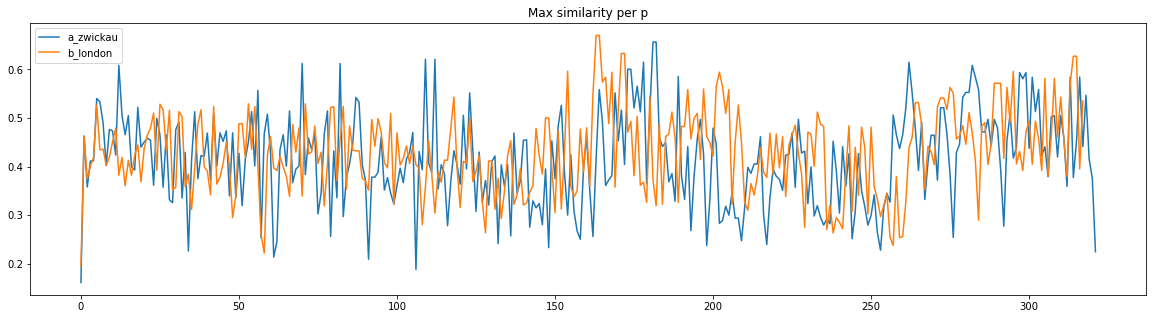

In [12]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(a_zwickau_max_similarity_per_p, label="a_zwickau")
ax.plot(b_london_max_similarity_per_p, label="b_london")
ax.legend()
plt.title('Max similarity per p')
plt.show()

In [13]:
def cross_version_similarity(version_1_corpus, version_2_corpus):
    res = []
    for i, p in enumerate(version_1_corpus):
        temp_corpus = [p] + version_2_corpus
        df_features = get_features(temp_corpus)
        temp_similarities = cosine_similarity(df_features, df_features)
        res.append(temp_similarities[0])
    return res

In [14]:
a_zwickau_b_london_similarities = cross_version_similarity(a_zwickau_corpus, b_london_corpus)
b_london_a_zwickau_similarities = cross_version_similarity(b_london_corpus, a_zwickau_corpus)


In [15]:
show_similarities_data(a_zwickau_b_london_similarities)

___ max similariry for paragraph: 0 ___
index: [71] value: 0.10809848098351847
index: [47] value: 0.11214885317241396
index: [210] value: 0.12473370288723398
index: [9] value: 0.16326785667663243
index: [20] value: 0.17139530852584747
index: [0] value: 1.0000000000000004
average: 0.04158143325767479
0 similarities: 1

___ max similariry for paragraph: 1 ___
index: [276] value: 0.4327684590827459
index: [6] value: 0.4595606020207321
index: [273] value: 0.46041197869045114
index: [314] value: 0.461978420190046
index: [2] value: 0.8924667418576064
index: [0] value: 1.0000000000000002
average: 0.2704258995078979
0 similarities: None

___ max similariry for paragraph: 2 ___
index: [306] value: 0.3193180574339377
index: [275] value: 0.32375575226515874
index: [221] value: 0.33798396017094445
index: [6] value: 0.3495791620176861
index: [3] value: 0.925084800814726
index: [0] value: 1.0000000000000002
average: 0.2035272200265997
0 similarities: None

___ max similariry for paragraph: 3 ___
ind

index: [84] value: 0.4303078176619153
index: [119] value: 0.4307365127259458
index: [206] value: 0.451057781621644
index: [193] value: 0.4744590239263768
index: [175] value: 0.8311007472426295
index: [0] value: 1.0000000000000007
average: 0.2662665591503877
0 similarities: None

___ max similariry for paragraph: 185 ___
index: [161] value: 0.43270450414945344
index: [221] value: 0.44094102211709274
index: [95] value: 0.45311113420523486
index: [206] value: 0.549108193754965
index: [177] value: 0.7800091220053458
index: [0] value: 0.9999999999999998
average: 0.277923782997812
0 similarities: None

___ max similariry for paragraph: 186 ___
index: [193] value: 0.2927788840851262
index: [63] value: 0.3090661563666809
index: [206] value: 0.3173392336755526
index: [177] value: 0.3371786163608068
index: [178] value: 0.7086625645158441
index: [0] value: 1.0000000000000004
average: 0.18456931006253766
0 similarities: None

___ max similariry for paragraph: 187 ___
index: [224] value: 0.31327908

In [16]:
show_similarities_data(b_london_a_zwickau_similarities)

___ max similariry for paragraph: 0 ___
index: [21] value: 0.11687471216798614
index: [74] value: 0.11863667507735084
index: [270] value: 0.12025268551074746
index: [195] value: 0.13113634998623677
index: [322] value: 0.20687784333141865
index: [0] value: 1.0
average: 0.047338778273389566
0 similarities: 1

___ max similariry for paragraph: 1 ___
index: [281] value: 0.4393859181023436
index: [283] value: 0.4428848625072197
index: [6] value: 0.4499081741622257
index: [7] value: 0.45322314406861547
index: [2] value: 0.8898054870442836
index: [0] value: 0.9999999999999996
average: 0.25588855088152057
0 similarities: None

___ max similariry for paragraph: 2 ___
index: [283] value: 0.34360496017886094
index: [281] value: 0.344308390573695
index: [282] value: 0.35095253502571183
index: [6] value: 0.37520444491962
index: [3] value: 0.9286977386346772
index: [0] value: 1.0000000000000004
average: 0.20326972109705188
0 similarities: None

___ max similariry for paragraph: 3 ___
index: [283] va


___ max similariry for paragraph: 72 ___
index: [88] value: 0.37366665327151266
index: [298] value: 0.3764590582856922
index: [170] value: 0.4081750304516112
index: [300] value: 0.41047954262501724
index: [79] value: 0.42191181035783676
index: [0] value: 1.0000000000000002
average: 0.23085165100560479
0 similarities: None

___ max similariry for paragraph: 73 ___
index: [89] value: 0.4125017623446423
index: [88] value: 0.4180176711178579
index: [298] value: 0.43321605350425274
index: [300] value: 0.454242884419859
index: [74] value: 0.8047518010929193
index: [0] value: 0.9999999999999998
average: 0.2599551025292005
0 similarities: None

___ max similariry for paragraph: 74 ___
index: [319] value: 0.41416137674056763
index: [300] value: 0.44682777007903607
index: [298] value: 0.4510095338828085
index: [78] value: 0.496247595580291
index: [75] value: 0.7692083005752147
index: [0] value: 1.0000000000000002
average: 0.26992588711717425
0 similarities: None

___ max similariry for paragrap

0 similarities: None

___ max similariry for paragraph: 190 ___
index: [198] value: 0.36976163464977324
index: [89] value: 0.38675844191962794
index: [170] value: 0.40790897160213163
index: [201] value: 0.4583707864293248
index: [200] value: 0.5893992038982757
index: [0] value: 1.0000000000000004
average: 0.20668736459123838
0 similarities: None

___ max similariry for paragraph: 191 ___
index: [198] value: 0.41884184197275875
index: [89] value: 0.4194674496537328
index: [174] value: 0.43003450530921805
index: [170] value: 0.47454822957515264
index: [201] value: 0.8815357187465749
index: [0] value: 1.0000000000000002
average: 0.2510888135784749
0 similarities: None

___ max similariry for paragraph: 192 ___
index: [319] value: 0.49951766874701314
index: [202] value: 0.508775145035224
index: [298] value: 0.5104753722160199
index: [89] value: 0.5114601194141112
index: [170] value: 0.5593364723349672
index: [0] value: 1.0000000000000009
average: 0.3188990252278996
0 similarities: None

__

0 similarities: None

___ max similariry for paragraph: 315 ___
index: [60] value: 0.37905927867574896
index: [106] value: 0.3859437162417341
index: [153] value: 0.4222978828707745
index: [71] value: 0.4494456949451128
index: [88] value: 0.466650856954988
index: [0] value: 1.0000000000000002
average: 0.22453800715304525
0 similarities: None

___ max similariry for paragraph: 316 ___
index: [125] value: 0.2918339593069693
index: [300] value: 0.29951820993719946
index: [170] value: 0.3076878661565287
index: [153] value: 0.3091869055337568
index: [298] value: 0.32850820946523696
index: [0] value: 1.0000000000000002
average: 0.18280222324772583
0 similarities: None

___ max similariry for paragraph: 317 ___
index: [71] value: 0.40988093304079964
index: [88] value: 0.43035061440271977
index: [55] value: 0.43178049321024836
index: [54] value: 0.4334868869045956
index: [153] value: 0.4796281752717998
index: [0] value: 1.0000000000000004
average: 0.2270612249175611
0 similarities: None



In [17]:
a_zwickau_b_london_max_similarity_per_p = get_max_similarity_per_p(a_zwickau_b_london_similarities)
b_london_a_zwickau_max_similarity_per_p = get_max_similarity_per_p(b_london_a_zwickau_similarities)

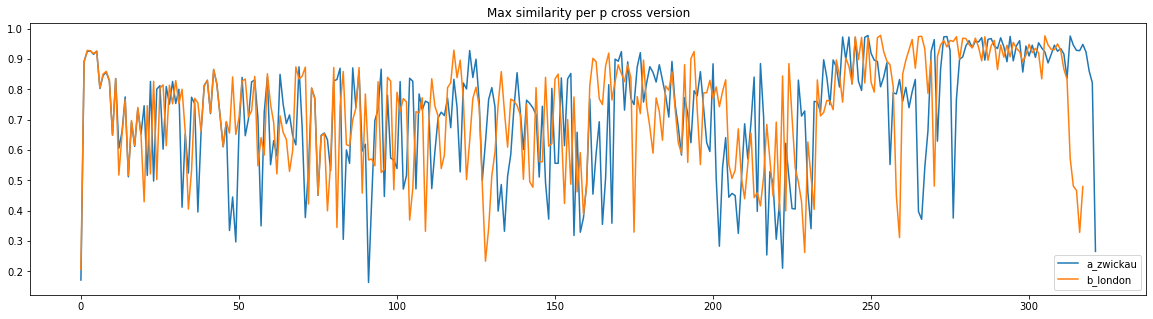

In [18]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(a_zwickau_b_london_max_similarity_per_p, label="a_zwickau")
ax.plot(b_london_a_zwickau_max_similarity_per_p, label="b_london")
ax.legend()
plt.title('Max similarity per p cross version')
plt.show()

In [19]:
def create_G_of_similaritis(similarities):
    G = nx.Graph()
    for index, value in enumerate(similarities):
        max_indices = thesisUtils.get_n_indexes_of_max_values(value, 6)
        max_indices_without_self = max_indices[:-1]
        G.add_node(index) # node himself
        for n in max_indices_without_self:
            G.add_node(n)
            weight = similarities[index][n]
            G.add_weighted_edges_from([(index, n, weight)])
    return G

In [20]:
def show_G(G):
    %matplotlib notebook

    fig = plt.figure(figsize=(10, 10))
    fig.canvas.manager.full_screen_toggle()

    pos=nx.spring_layout(G)
    nx.draw(
        G, 
        pos,
        with_labels=True, 
    )
    fig.show()

In [21]:
a_zwickau_G = create_G_of_similaritis(a_zwickau_similarities)
b_london_G = create_G_of_similaritis(b_london_similarities)

In [22]:
print(len(list(nx.connected_components(a_zwickau_G))))
print(len(list(nx.connected_components(b_london_G))))

1
1


In [23]:
a_zwickau_sorted_degree = sorted(a_zwickau_G.degree, key=lambda x: x[1], reverse=True)
print(a_zwickau_sorted_degree)

[(169, 83), (280, 74), (297, 68), (299, 56), (281, 49), (123, 47), (87, 47), (318, 45), (88, 40), (152, 39), (282, 38), (283, 28), (5, 26), (173, 25), (54, 24), (12, 22), (105, 22), (121, 20), (64, 20), (74, 20), (313, 19), (59, 18), (24, 17), (70, 17), (201, 17), (6, 16), (30, 16), (36, 16), (279, 15), (63, 15), (77, 15), (184, 15), (46, 14), (21, 14), (82, 13), (182, 13), (241, 12), (289, 12), (25, 12), (27, 12), (192, 12), (227, 12), (316, 12), (15, 11), (86, 11), (301, 11), (255, 11), (262, 11), (18, 10), (20, 10), (73, 10), (23, 10), (185, 10), (155, 10), (303, 10), (257, 10), (274, 9), (39, 9), (71, 9), (101, 9), (109, 9), (171, 9), (284, 9), (211, 9), (290, 9), (176, 9), (263, 9), (9, 8), (58, 8), (139, 8), (53, 8), (43, 8), (45, 8), (238, 8), (80, 8), (240, 8), (167, 8), (108, 8), (219, 8), (112, 8), (120, 8), (137, 8), (161, 8), (160, 8), (200, 8), (163, 8), (258, 8), (264, 8), (296, 8), (308, 8), (212, 7), (7, 7), (10, 7), (213, 7), (52, 7), (40, 7), (42, 7), (246, 7), (95, 7

In [24]:
b_london_sorted_degree = sorted(b_london_G.degree, key=lambda x: x[1], reverse=True)
print(b_london_sorted_degree)

[(192, 71), (162, 57), (205, 54), (272, 53), (291, 48), (118, 42), (310, 39), (80, 38), (289, 38), (313, 36), (273, 36), (98, 30), (83, 29), (71, 29), (25, 27), (31, 26), (274, 26), (275, 24), (5, 22), (51, 22), (55, 22), (163, 21), (147, 21), (82, 20), (305, 19), (151, 19), (74, 18), (234, 17), (164, 16), (231, 16), (94, 16), (26, 15), (233, 15), (100, 15), (271, 14), (197, 14), (148, 14), (209, 12), (28, 12), (42, 12), (160, 12), (208, 12), (308, 11), (59, 11), (92, 11), (93, 11), (218, 11), (216, 11), (153, 11), (176, 10), (11, 10), (46, 10), (73, 10), (281, 10), (166, 10), (293, 10), (183, 10), (172, 10), (21, 9), (276, 9), (13, 9), (115, 9), (37, 9), (165, 9), (56, 9), (53, 9), (97, 9), (67, 9), (85, 9), (101, 9), (117, 9), (261, 9), (252, 9), (282, 9), (20, 8), (9, 8), (18, 8), (27, 8), (222, 8), (317, 8), (38, 8), (187, 8), (49, 8), (158, 8), (106, 8), (207, 8), (315, 8), (134, 8), (295, 8), (204, 8), (174, 8), (311, 7), (220, 7), (79, 7), (245, 7), (88, 7), (24, 7), (226, 7), (

In [25]:
a_zwickau_strongly_connected_nodes = [(node, degree) for node, degree in a_zwickau_sorted_degree if degree >= 10]
print(len(a_zwickau_strongly_connected_nodes))
print(a_zwickau_strongly_connected_nodes)

56
[(169, 83), (280, 74), (297, 68), (299, 56), (281, 49), (123, 47), (87, 47), (318, 45), (88, 40), (152, 39), (282, 38), (283, 28), (5, 26), (173, 25), (54, 24), (12, 22), (105, 22), (121, 20), (64, 20), (74, 20), (313, 19), (59, 18), (24, 17), (70, 17), (201, 17), (6, 16), (30, 16), (36, 16), (279, 15), (63, 15), (77, 15), (184, 15), (46, 14), (21, 14), (82, 13), (182, 13), (241, 12), (289, 12), (25, 12), (27, 12), (192, 12), (227, 12), (316, 12), (15, 11), (86, 11), (301, 11), (255, 11), (262, 11), (18, 10), (20, 10), (73, 10), (23, 10), (185, 10), (155, 10), (303, 10), (257, 10)]


In [26]:
b_london_strongly_connected_nodes = [(node, degree) for node, degree in b_london_sorted_degree if degree >= 10]
print(len(b_london_strongly_connected_nodes))
print(b_london_strongly_connected_nodes)

58
[(192, 71), (162, 57), (205, 54), (272, 53), (291, 48), (118, 42), (310, 39), (80, 38), (289, 38), (313, 36), (273, 36), (98, 30), (83, 29), (71, 29), (25, 27), (31, 26), (274, 26), (275, 24), (5, 22), (51, 22), (55, 22), (163, 21), (147, 21), (82, 20), (305, 19), (151, 19), (74, 18), (234, 17), (164, 16), (231, 16), (94, 16), (26, 15), (233, 15), (100, 15), (271, 14), (197, 14), (148, 14), (209, 12), (28, 12), (42, 12), (160, 12), (208, 12), (308, 11), (59, 11), (92, 11), (93, 11), (218, 11), (216, 11), (153, 11), (176, 10), (11, 10), (46, 10), (73, 10), (281, 10), (166, 10), (293, 10), (183, 10), (172, 10)]


<IPython.core.display.Javascript object>


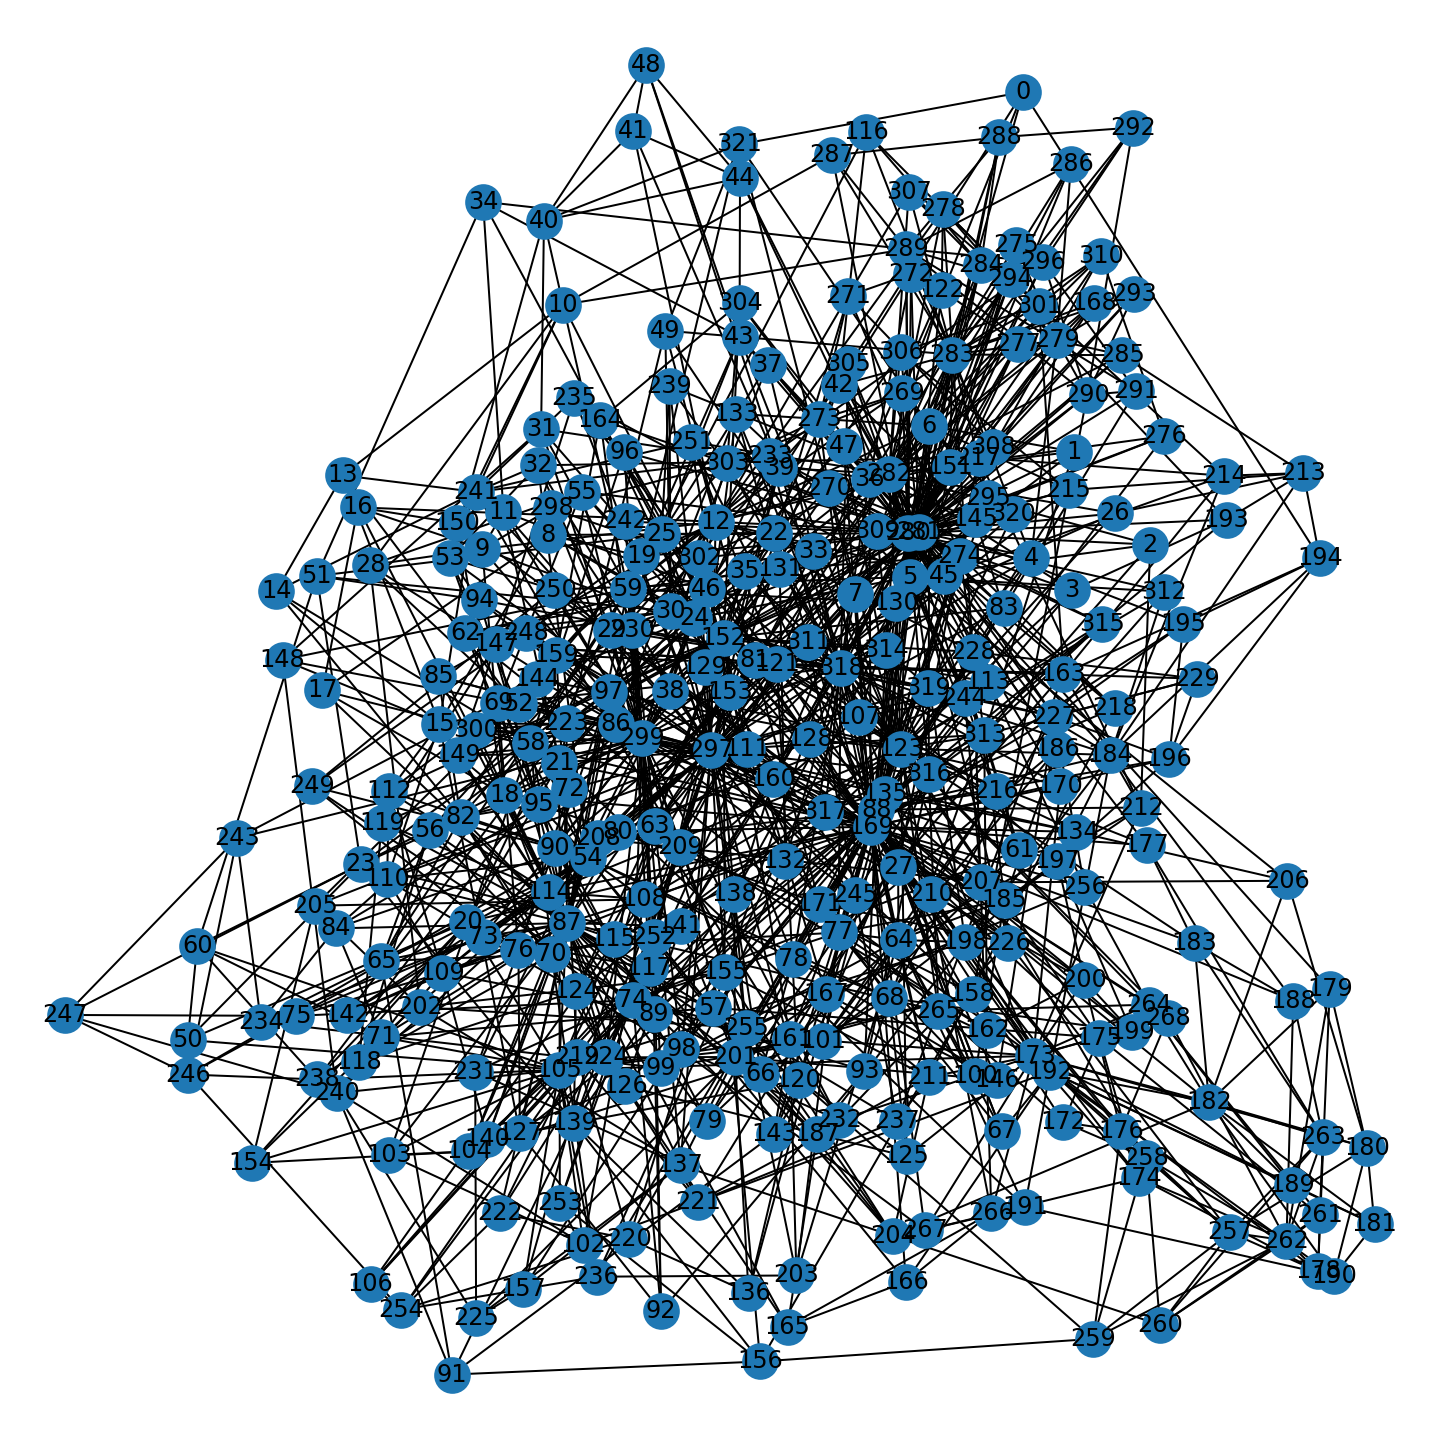

In [29]:
show_G(a_zwickau_G)

<IPython.core.display.Javascript object>


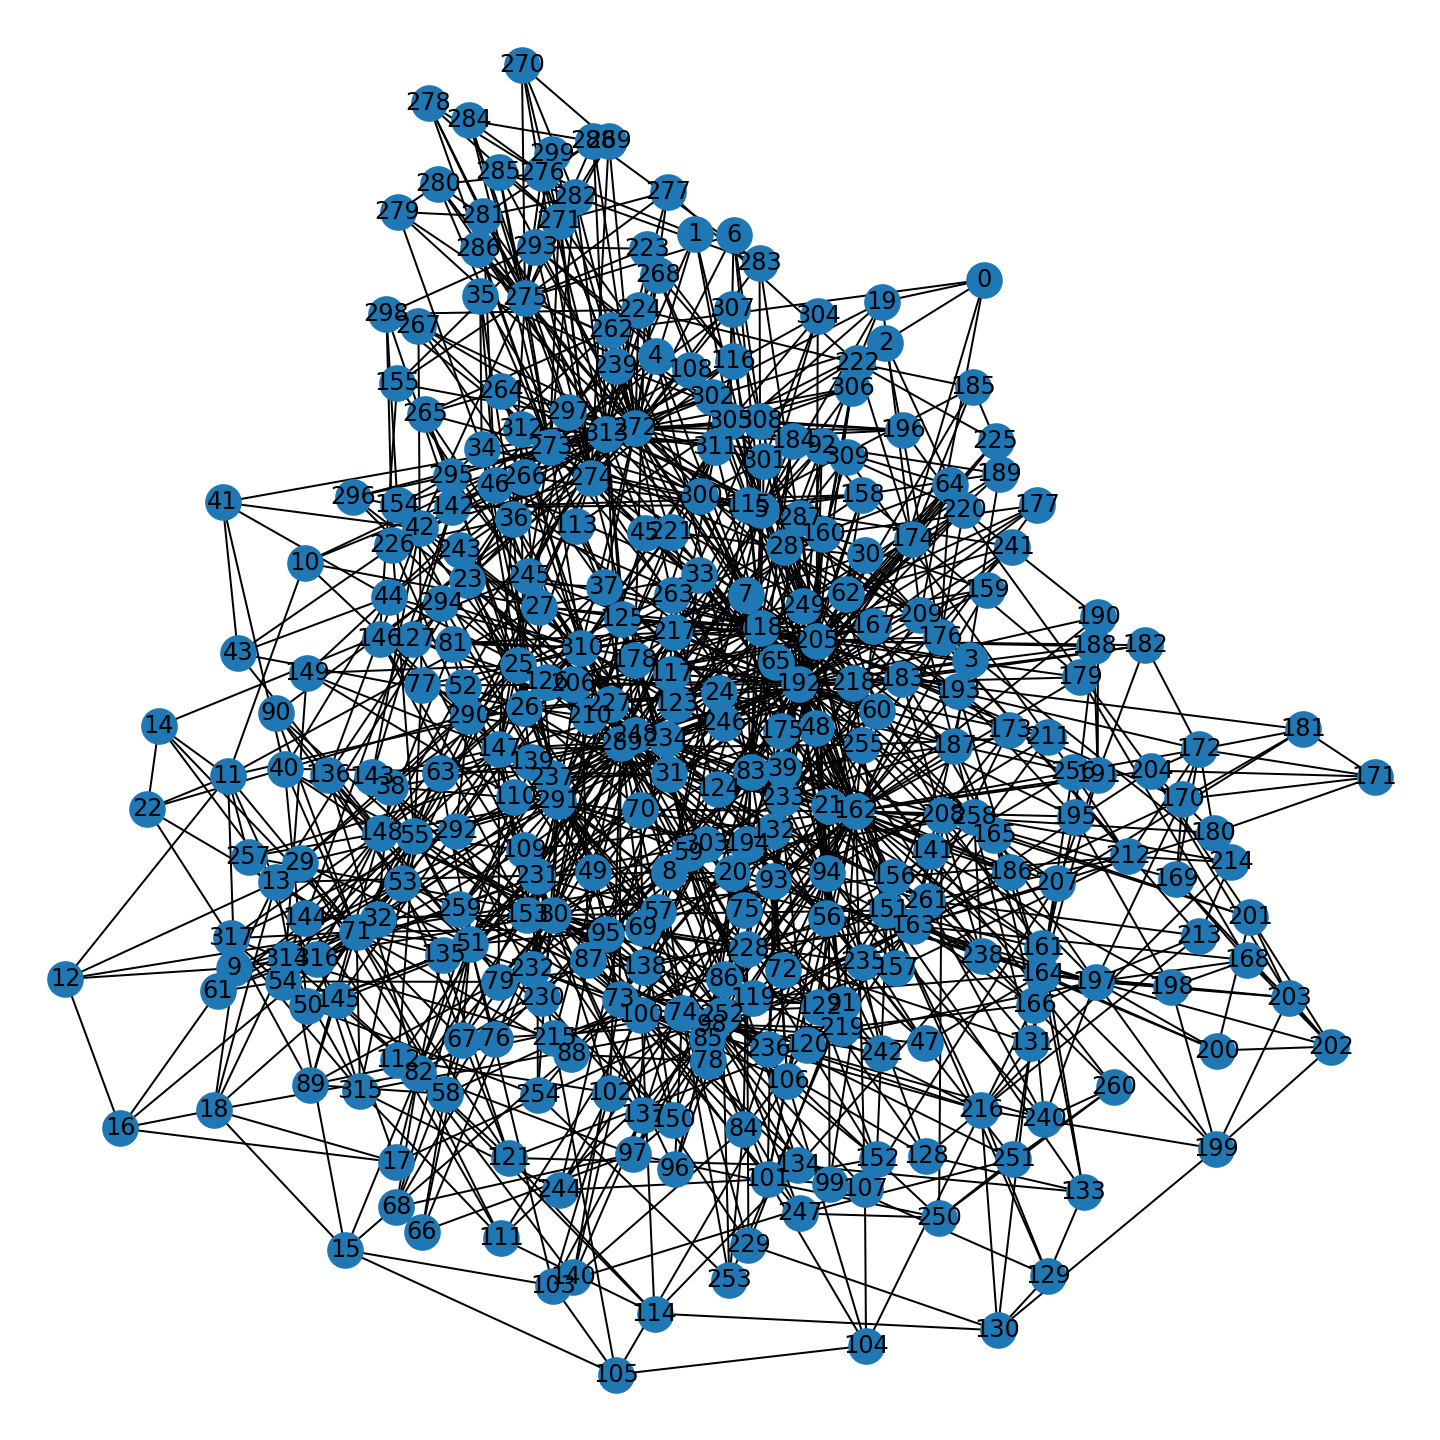

In [30]:
show_G(b_london_G)